In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

2024-02-15 09:04:49.212812: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 09:04:49.292717: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 09:04:49.292802: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 09:04:49.295945: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 09:04:49.309490: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 09:04:50.977534: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [2]:
# load weights into new model
new_model = keras.models.load_model("simple_classificator.keras")
print("Loaded model from disk")

Loaded model from disk


In [3]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

1/1 [==============================] - 0s 80ms/step
1


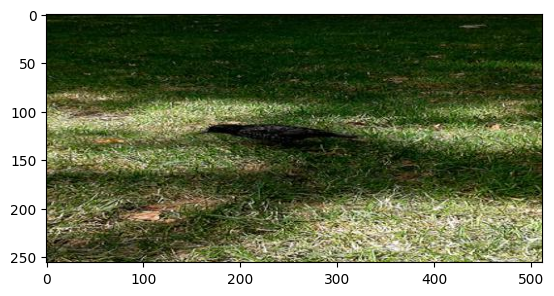

In [5]:
#Validate on an image
from keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# predict for my data
new_path = './testimgs/99997.jpeg'
image_result=Image.open(new_path)

img_width,img_height = 512, 256 # как при тренировке исходной модели
 
def data_resizing_process(dirs):
    datas = image.load_img(dirs, target_size = (img_width,img_height))
    res = image.img_to_array(datas)
    res = np.expand_dims(res, axis = 0)
    res /= 255
    return res

# img = image.load_img(new_path, target_size=(img_width,img_height,3))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img/255.

img = data_resizing_process(new_path)
result = new_model.predict(img)
print(np.argmax(result))

image_result=plt.imshow(image_result)
plt.show()

1/1 [==============================] - 0s 82ms/step
1


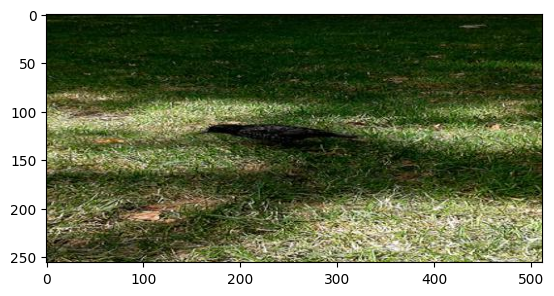

1/1 [==============================] - 0s 72ms/step
0


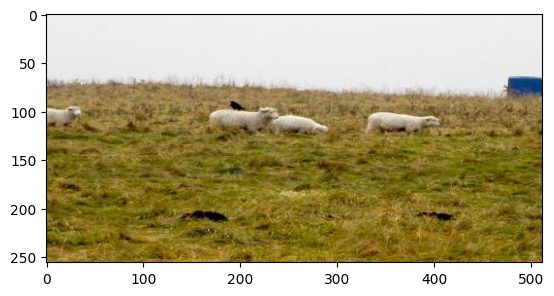

1/1 [==============================] - 0s 76ms/step
0


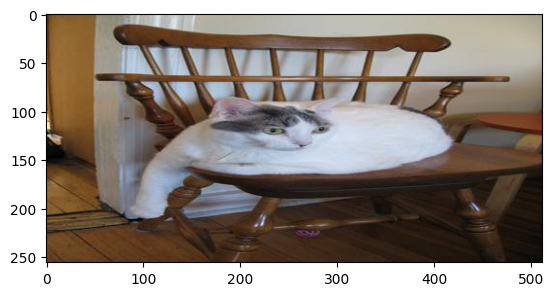

In [7]:
for i in range(7,10): 
    new_path = f'./testimgs/9999{i}.jpeg'
    image_result=Image.open(new_path)
    
    img = data_resizing_process(new_path)
    result = new_model.predict(img)
    print(np.argmax(result))

    image_result=plt.imshow(image_result)
    plt.show()